In [14]:
import pickle
from random import shuffle, seed
import numpy as np
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') # get rid of silly sklearn warnings

seed("sahai uwu")

In [15]:
ppath = "/Volumes/scottd/mimic_processed/preproced.bin"
data = pickle.load(open(ppath, 'rb')) # Tuples of (text, label) where label is 0 or 1
shuffle(data)

split_point = int(0.8 * len(data)) # Use 80% of our data for training and the rest for testing
train = data[:split_point]
test = data[split_point:]

train_data = [t[0] for t in train]
train_labels = [t[1] for t in train]
test_data = [t[0] for t in test]
test_labels = [t[1] for t in test]

print("Number of training samples: " + str(len(train)))
print("Number of test samples: " + str(len(test)))
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

Number of training samples: 5660
Number of test samples: 1415
(array([0, 1]), array([3347, 2313]))
(array([0, 1]), array([859, 556]))


In [18]:
# Train fastText model
from fastText_model import ClassificationModel

dim = 50
model = ClassificationModel()
model.train(train_data, train_labels, dim=dim)

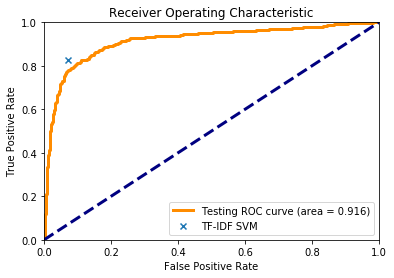

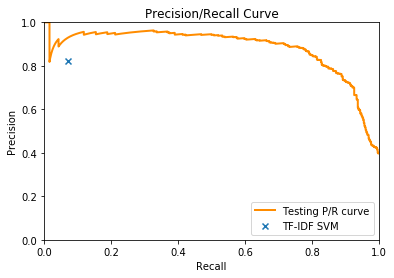

In [20]:
confs = [model.predict(s) for s in test_data]

test_fpr, test_tpr, test_thresholds = roc_curve(test_labels, confs, pos_label=1)
test_roc_auc = auc(test_fpr, test_tpr)

plt.figure()
lw = 3
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Testing ROC curve (area = %0.3f)' % test_roc_auc)
plt.scatter([0.07156],[0.82897], marker='x', label='TF-IDF SVM')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

precision, recall, thresholds = precision_recall_curve(test_labels, confs)
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange',
         lw=lw, label='Testing P/R curve')
plt.scatter([0.072],[0.820], marker='x', label='TF-IDF SVM')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision/Recall Curve')
plt.legend(loc="lower right")
plt.show()